In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**First DataSet found at [macrotrends](https://www.macrotrends.net/2533/cotton-prices-historical-chart-data)**

In [ ]:
import pandas as pd
dataset = pd.read_csv("../input/cottonprices/cotton-prices-historical-chart-data.csv")

In [ ]:
dataset.info()

In [ ]:
dataset.head(10)

## Cotton price values

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(dataset)

## Preprocessing

In [ ]:
training_set = dataset.iloc[:9898].values
test_set = dataset.iloc[9898:].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Model Architecture

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Training model on training data

In [ ]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

## Predicting values

In [ ]:
X_test = []
dataset = dataset.iloc[:].values
for i in range(len(training_set), len(dataset)):
    X_test.append(dataset[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_test_values = regressor.predict(X_test)
predicted_test_values = sc.inverse_transform(predicted_test_values)

In [ ]:
predicted_test_values = predicted_test_values

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

## Saving the model

In [ ]:
model_json = regressor.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
regressor.save_weights("model.h5")

## Loading above trained model 

In [ ]:
# from keras.models import model_from_json
# # load json and create model
# json_file = open('../input/trained-values/model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# regressor = model_from_json(loaded_model_json)
# # load weights into new model
# regressor.load_weights("../input/trained-values/model.h5")
# print("Loaded model from disk")

**As can be seen from above visualization, the model is following the trend properly but the values are not accurate**

# **Changing the optimizer**

In [ ]:
regressor2 = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor2.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor2.add(Dense(units = 1))

# Compiling the RNN
regressor2.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [ ]:
# Fitting the RNN to the Training set
regressor2.fit(X_train, y_train, epochs = 100, batch_size = 32)

## Prediction

In [ ]:
X_test2 = []
dataset = dataset.iloc[:].values
for i in range(len(training_set), len(dataset)):
    X_test2.append(dataset[i-60:i, 0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))

In [ ]:
predicted_test_values2 = regressor2.predict(X_test2)
predicted_test_values2 = sc.inverse_transform(predicted_test_values2)

In [ ]:
predicted_test_values2 = predicted_test_values2

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values2, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

## Saving the model

In [ ]:
model_json = regressor2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
regressor2.save_weights("model2.h5")

## Loading above trained model

In [ ]:
# from keras.models import model_from_json
# # load json and create model
# json_file = open('../input/model2/model2.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# regressor2 = model_from_json(loaded_model_json)
# # load weights into new model
# regressor2.load_weights("../input/model2/model2.h5")
# print("Loaded model from disk")

Changing the optimizer doesnot solve our problem. So lets try with some other architecture design.

# Version 2

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from keras.layers import Dropout
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv("../input/cottonprices/cotton-prices-historical-chart-data.csv")
df.info()

In [ ]:
df.shape

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Cotton Price History')
plt.plot(df)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

## Spliting data as training and test data

In [ ]:
data = df
dataset = data.values#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

## Preprocessing

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

## New model architecture

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=4, epochs=10)

## Prediction

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test[0]

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test[0:2])
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(data[training_data_len:], color = 'red', label = 'Real Cotton Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

## Saving the model

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model2.h5")

# Choosing best parameters

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from keras.layers import Dropout
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv("../input/cottonprices/cotton-prices-historical-chart-data.csv")
df.info()

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Cotton Price History')
plt.plot(df)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
def modelTraining(time,neurons,optimizer,batch,epochs,train_data):
    
    x_train=[]
    y_train = []
    for i in range(time,len(train_data)):
        x_train.append(train_data[i-time:i,0])
        y_train.append(train_data[i,0])
    #Convert x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    #Reshape the data into the shape accepted by the LSTM
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    #Build the LSTM network model
    model = Sequential()
    model.add(LSTM(units=neurons, return_sequences=True,input_shape=(x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=neurons, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    
    #Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    #Train the model
    model.fit(x_train, y_train, batch_size=batch, epochs=epochs)
    
    #Test data set
    test_data = scaled_data[training_data_len - time: , : ]#Create the x_test and y_test data sets
    x_test = []
    y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
    for i in range(time,len(test_data)):
        x_test.append(test_data[i-time:i,0])
        
    #Convert x_test to a numpy array 
    x_test = np.array(x_test)
    
    #Reshape the data into the shape accepted by the LSTM
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    
    #Getting the models predicted price values
    predictions = model.predict(x_test) 
    predictions = scaler.inverse_transform(predictions)#Undo scaling
    
    #Plot/Create the data for the graph
    train = df[:training_data_len]
    valid = df[training_data_len:]
    valid['Predictions'] = predictions#Visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train)
    plt.plot(valid)
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.savefig('img'+str(time)+str(neurons)+str(optimizer)+str(batch)+str(epochs)+'.png')
    plt.show()
    
    #save the model
    model_json = model.to_json()
    with open("model"+str(time)+str(neurons)+str(optimizer)+str(batch)+str(epochs)+".json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model"+str(time)+str(neurons)+str(optimizer)+str(batch)+str(epochs)+".h5")
    
    #Calculate/Get the value of RMSE
    rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
    print(rmse)
    return rmse

In [ ]:
result_error = []
result_parameters = []

time_values = [30,45,60]
neurons_values = [40,50]
optimizer_values = ['adam','rmsprop']
batch_values = [4,16,32]
epochs_values = [10,15]

dataset = df.values#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]#Split the data into x_train and y_train data sets


for t in time_values:
    for n in neurons_values:
        for o in optimizer_values:
            for b in batch_values:
                for e in epochs_values:
                    result_parameters.append([t,n,o,b,e])
                    result_error.append(modelTraining(t,n,o,b,e,train_data))


In [ ]:
print(result_parameters)
print(result_error)

In [ ]:
min_index = result_error.index(min(result_error))

In [ ]:
result_parameters[min_index]

**Parameter Tuning Results for 30 days of time set in LSTM**

In [ ]:
plt.plot(result_error)

In [ ]:
for i in range(len(result_error)):
    result_parameters[i].append(result_error[i])

In [ ]:
conclusion = pd.DataFrame(result_parameters,columns=['learning_time','neurons','optimizer','batch_size','epochs','RMS'])

**Results in Tabular form**

In [ ]:
conclusion

In [ ]:
conclusion.sort_values('RMS')

# Observations

* The Best Result comes with parameters: **Neurons = 40**, **Optimizer = RMSPROP**, **Batch_size = 4**, **Epochs = 10**
* Overall Results show that using **Neurons = 50**, **Optimizer = Adam**, **Epochs = 15** gives optimal results with all batch size
* So we will consider above 2 parametrs (In second case the batch size 16 will be used) and test for time parameters: 45 and 60 to see if we can increse the accuracy
* We could have added the Time parameter in parameter tuning but it then require 72 combinations. Our current hardware and kaggle use limit does not permit this

# Training above 2 choosen parameters sets on Time = 45days 

In [ ]:
# Training on 45 days
result_error_45 = []
result_parameter_45 = [[45,50,'rmsprop',4,10],[45,50,'adam',16,15]]

result_error_45.append(modelTraining(45,50,'rmsprop',4,10,train_data))
result_error_45.append(modelTraining(45,50,'adam',16,15,train_data))

In [ ]:
print(result_parameter_45)
print(result_error_45)

In [ ]:
for i in range(len(result_error_45)):
    result_parameter_45[i].append(result_error_45[i])

In [ ]:
conclusion_45 = pd.DataFrame(result_parameter_45,columns=['learning_time','neurons','optimizer','batch_size','epochs','RMS'])

In [ ]:
conclusion_45

# Training above 2 choosen parameters sets on Time = 60 days 

In [ ]:
# Training on 60 days
result_error_60 = []
result_parameter_60 = [[60,50,'rmsprop',4,10],[60,50,'adam',16,15]]

result_error_60.append(modelTraining(60,50,'rmsprop',4,10,train_data))
result_error_60.append(modelTraining(60,50,'adam',16,15,train_data))

In [ ]:
print(result_parameter_60)
print(result_error_60)

In [ ]:
for i in range(len(result_error_60)):
    result_parameter_60[i].append(result_error_60[i])

In [ ]:
conclusion_60 = pd.DataFrame(result_parameter_60,columns=['learning_time','neurons','optimizer','batch_size','epochs','RMS'])

In [ ]:
conclusion_60

In [ ]:
results = pd.concat([conclusion,conclusion_45,conclusion_60], axis=0)
results

In [ ]:
results.sort_values('RMS')

# Top 3 model parameters with least error

# 1. RMS = 0.017960


## Parameters
### Time = 30, Neurons = 40, Optimizer = RMSPROP, Batch_size = 4, Epochs = 10

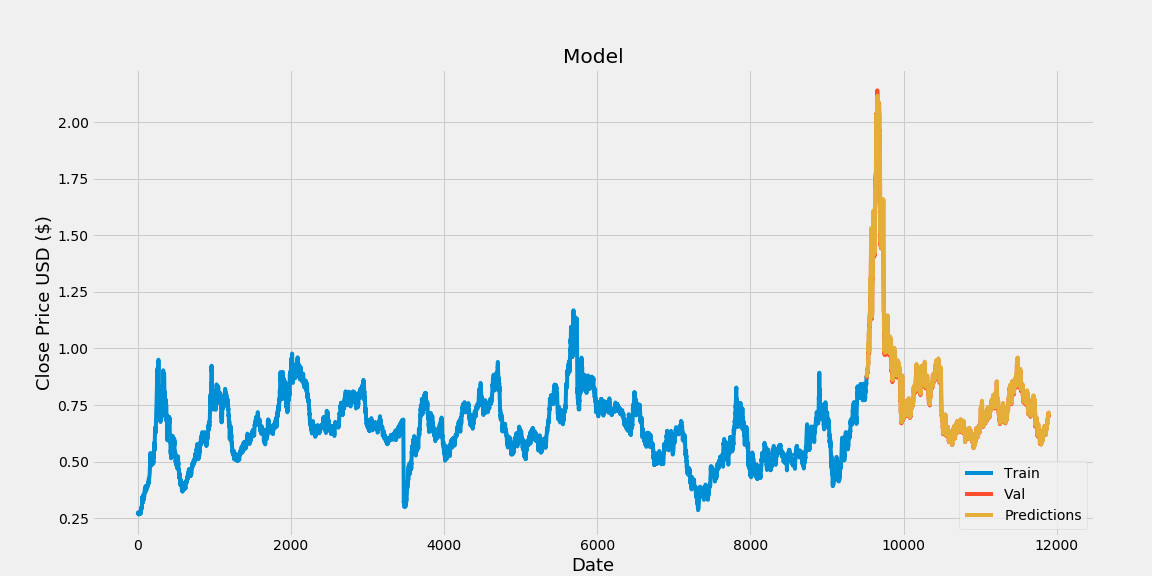


# 2. RMS = 0.018285

## Parameters
### Time = 45, Neurons = 50, Optimizer = Adam, Batch_size = 16, Epochs = 15

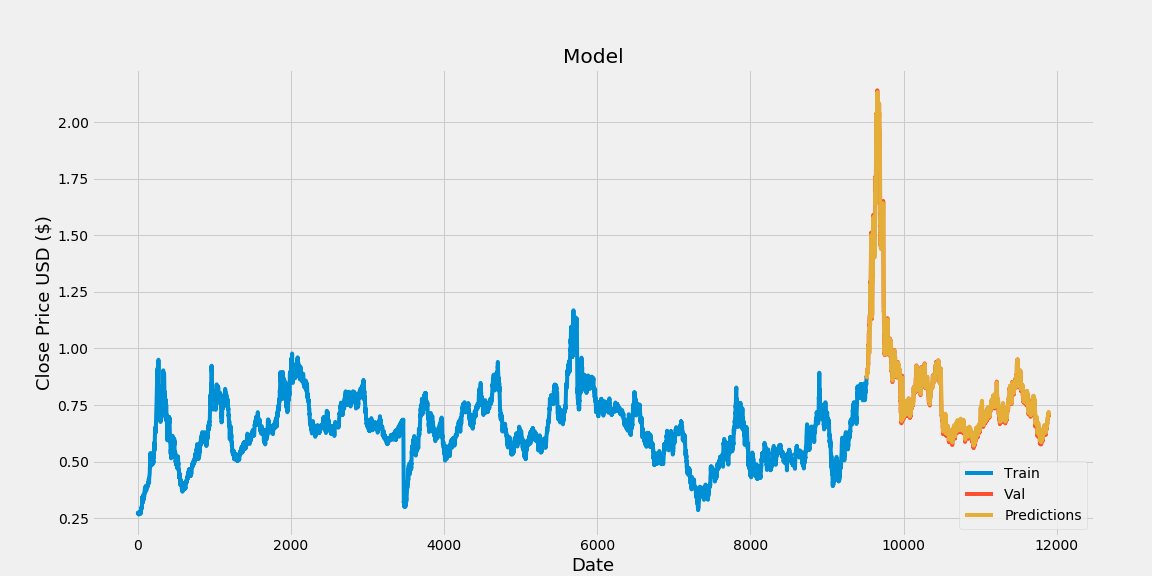


# 3. RMS = 0.018588

## Parameters
### Time = 60, Neurons = 50, Optimizer = RMSPROP, Batch_size = 4, Epochs = 10
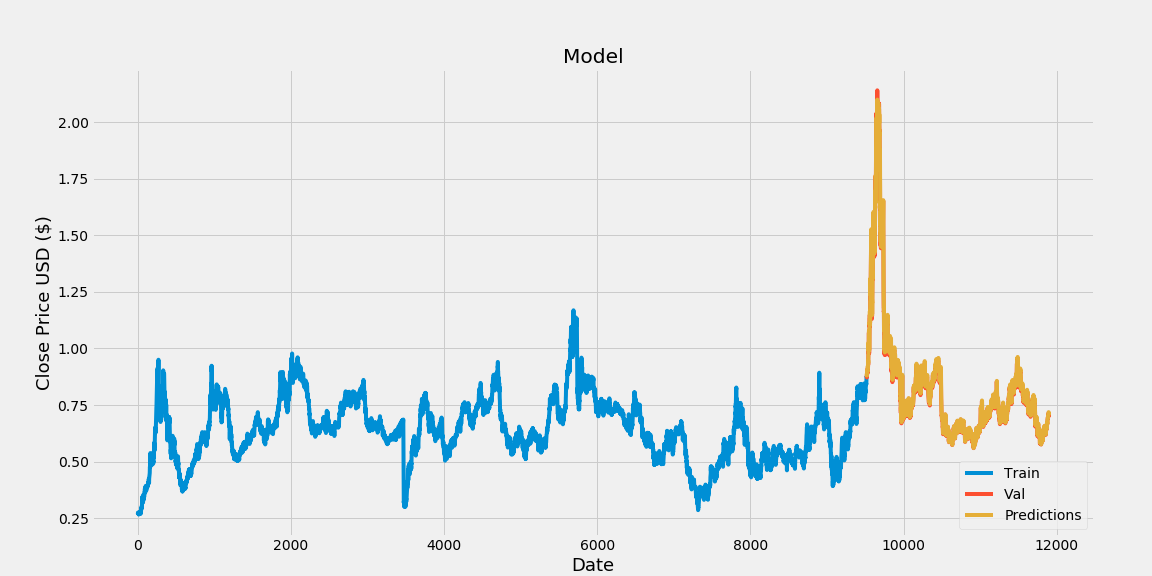

# Loading any above trained model

In [ ]:
from keras.models import model_from_json
# load json and create model
json_file = open('../input/bestrnnparameters/model3040rmsprop410.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
regressor2 = model_from_json(loaded_model_json)
# load weights into new model
regressor2.load_weights("../input/bestrnnparameters/model3040rmsprop410.h5")
print("Loaded model from disk")

In [ ]:
#Getting the models predicted price values
predictions = regressor2.predict(x_test) 
print(predictions)
predictions = scaler.inverse_transform(predictions)#Undo scaling

# New Dataset

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from keras.layers import Dropout
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
df = pd.read_csv("../input/dataset3/Price.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 5 columns):
Date                     2394 non-null object
Traded Contract(Lots)    2394 non-null int64
Quantity (000's)         2394 non-null float64
Total Value (Lacs)       2394 non-null float64
Instrument Type          2394 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 93.6+ KB


In [3]:
df.head(5)

,Date,Traded Contract(Lots),Quantity (000's),Total Value (Lacs),Instrument Type
0,03-Oct-11,384,9.60,1773.14,FUTCOM
1,04-Oct-11,603,15.08,2782.83,FUTCOM
2,05-Oct-11,403,10.08,1850.26,FUTCOM
3,06-Oct-11,0,0.00,0.00,FUTCOM
4,07-Oct-11,192,4.80,884.20,FUTCOM


In [4]:
df = df[df['Total Value (Lacs)']!=0]
df['price'] = df['Total Value (Lacs)']/df["Quantity (000's)"]

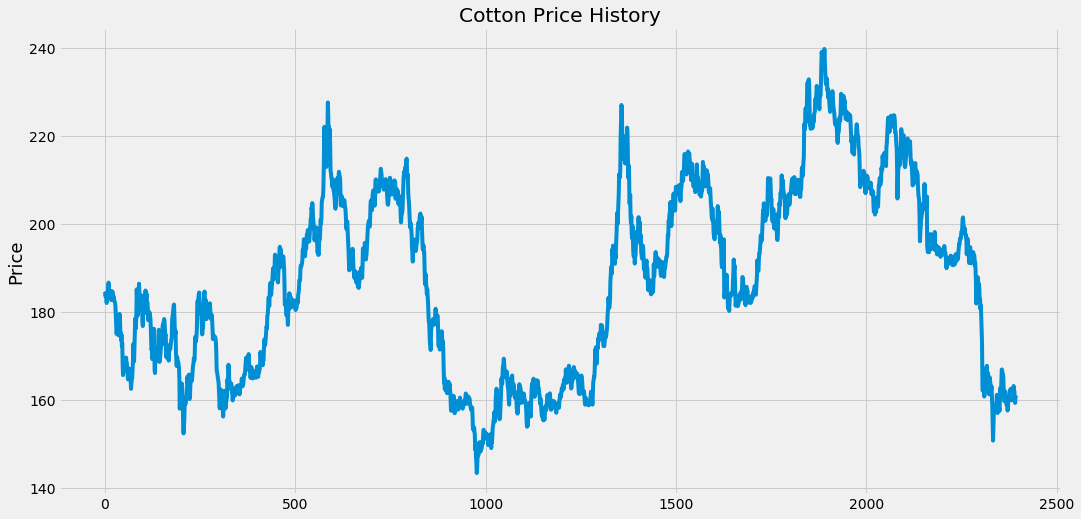

In [5]:
plt.figure(figsize=(16,8))
plt.title('Cotton Price History')
plt.plot(df['price'])
# plt.xticks(list(range(0,len(df))),df['Date'])
plt.ylabel('Price',fontsize=18)
plt.show()

In [6]:
def modelTraining(time,neurons,optimizer,batch,epochs,train_data):
    
    x_train=[]
    y_train = []
    for i in range(time,len(train_data)):
        x_train.append(train_data[i-time:i,0])
        y_train.append(train_data[i,0])
    #Convert x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    #Reshape the data into the shape accepted by the LSTM
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    #Build the LSTM network model
    model = Sequential()
    model.add(LSTM(units=neurons, return_sequences=True,input_shape=(x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=neurons, return_sequences=False))
    model.add(Dropout(0.2))
#     model.add(LSTM(units=neurons, return_sequences=False))
#     model.add(Dropout(0.2))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    
    #Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    print("Reached here")
    
    #Train the model
    model.fit(x_train, y_train, batch_size=batch, epochs=epochs)
    
    #Test data set
    test_data = scaled_data[training_data_len - time: , : ]#Create the x_test and y_test data sets
    x_test = []
    y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
    for i in range(time,len(test_data)):
        x_test.append(test_data[i-time:i,0])
        
    #Convert x_test to a numpy array 
    x_test = np.array(x_test)
    
    #Reshape the data into the shape accepted by the LSTM
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    
    #Getting the models predicted price values
    predictions = model.predict(x_test) 
    predictions = scaler.inverse_transform(predictions)#Undo scaling
    
    #Plot/Create the data for the graph
    train = df[:training_data_len]
    valid = df[training_data_len:]
    valid['Predictions'] = predictions#Visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Price', fontsize=18)
    plt.plot(train)
    plt.plot(valid)
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.savefig('img2-'+str(time)+str(neurons)+str(optimizer)+str(batch)+str(epochs)+'.png')
    plt.show()
    
    #save the model
    model_json = model.to_json()
    with open("model2-"+str(time)+str(neurons)+str(optimizer)+str(batch)+str(epochs)+".json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model2-"+str(time)+str(neurons)+str(optimizer)+str(batch)+str(epochs)+".h5")
    
    #Calculate/Get the value of RMSE
    rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
    print(rmse)
    return rmse

Reached here
Epoch 1/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0084
Epoch 2/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0026
Epoch 3/10
1834/1834 [==============================] - 30s 16ms/step - loss: 0.0019
Epoch 4/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0016
Epoch 5/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0015
Epoch 6/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0013
Epoch 7/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0014
Epoch 8/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0013
Epoch 9/10
1834/1834 [==============================] - 28s 16ms/step - loss: 0.0012
Epoch 10/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0013


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


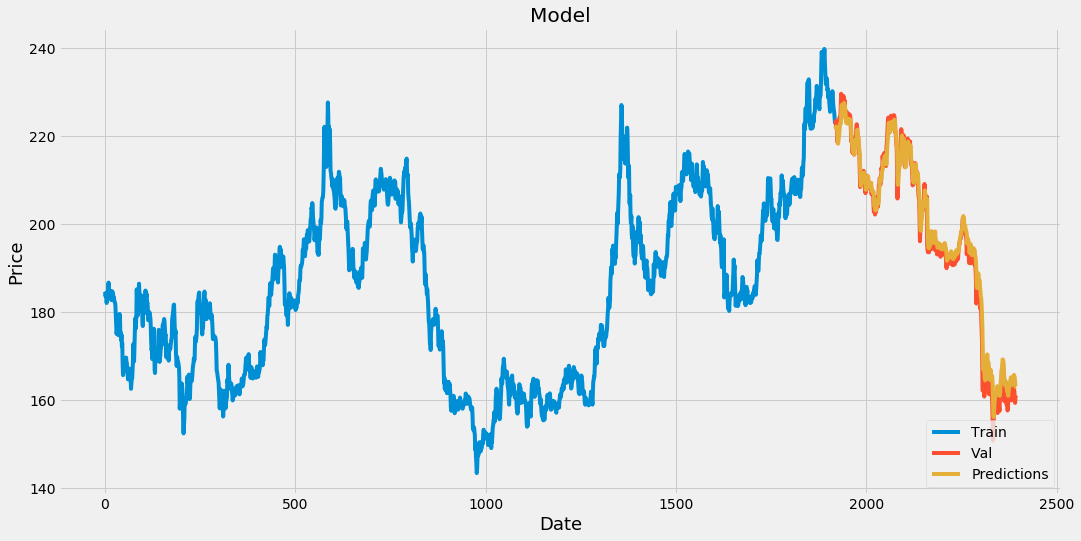

2.4525547814656266
Root mean Square error = 2.4525547814656266


In [7]:
df = pd.DataFrame(df['price'])
dataset = df.values#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]#Split the data into x_train and y_train data sets
print("Root mean Square error =",modelTraining(60,50,'rmsprop',4,10,train_data))


## Applying Parameter Tuning on this dataset

Reached here
Epoch 1/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0081
Epoch 2/10
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0025
Epoch 3/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0019
Epoch 4/10
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0017
Epoch 5/10
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0017
Epoch 6/10
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0014
Epoch 7/10
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0016
Epoch 8/10
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0014
Epoch 9/10
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0014
Epoch 10/10
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0012


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


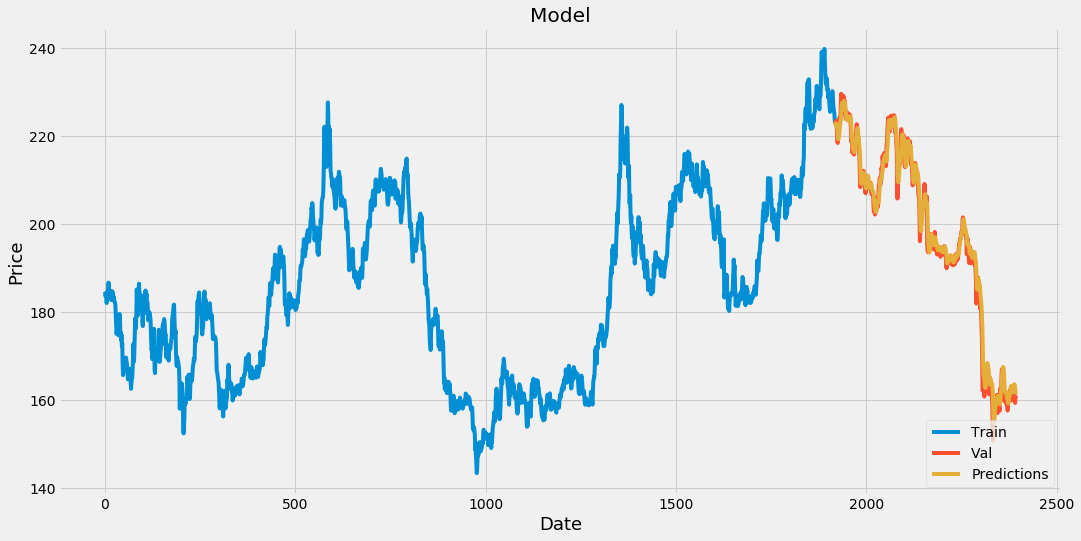

2.2695695031418013
Reached here
Epoch 1/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0075
Epoch 2/15
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0026
Epoch 3/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0019
Epoch 4/15
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0016
Epoch 5/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0016
Epoch 6/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0014
Epoch 7/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0014
Epoch 8/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0013
Epoch 9/15
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0015
Epoch 10/15
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0013
Epoch 11/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0012
Epoch 12/15
1834/1834 [========

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


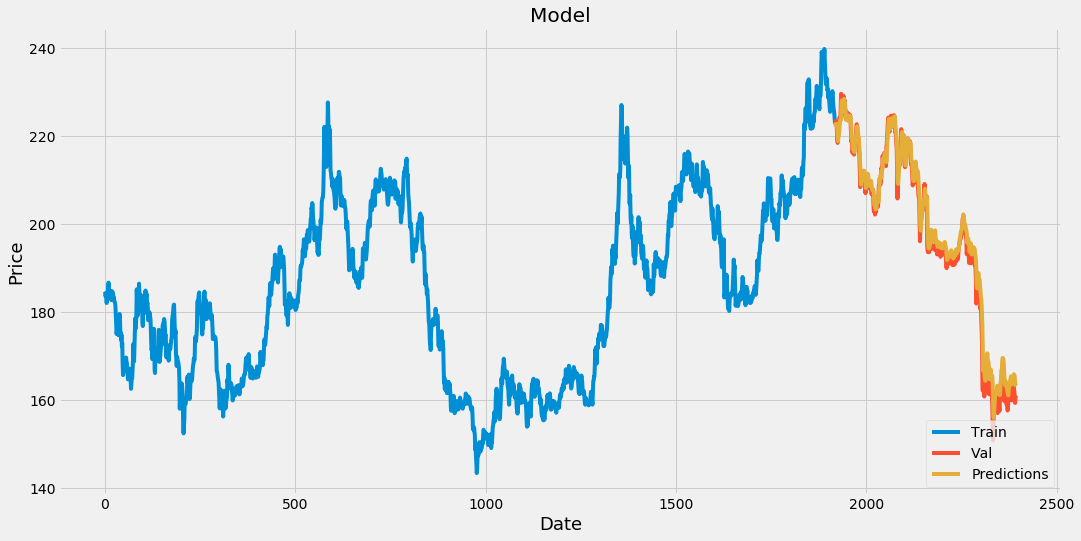

2.537485221368788
Reached here
Epoch 1/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0161
Epoch 2/10
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0039
Epoch 3/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0033
Epoch 4/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0028
Epoch 5/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0027
Epoch 6/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0020
Epoch 7/10
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0018
Epoch 8/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0018
Epoch 9/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0017
Epoch 10/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0016


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


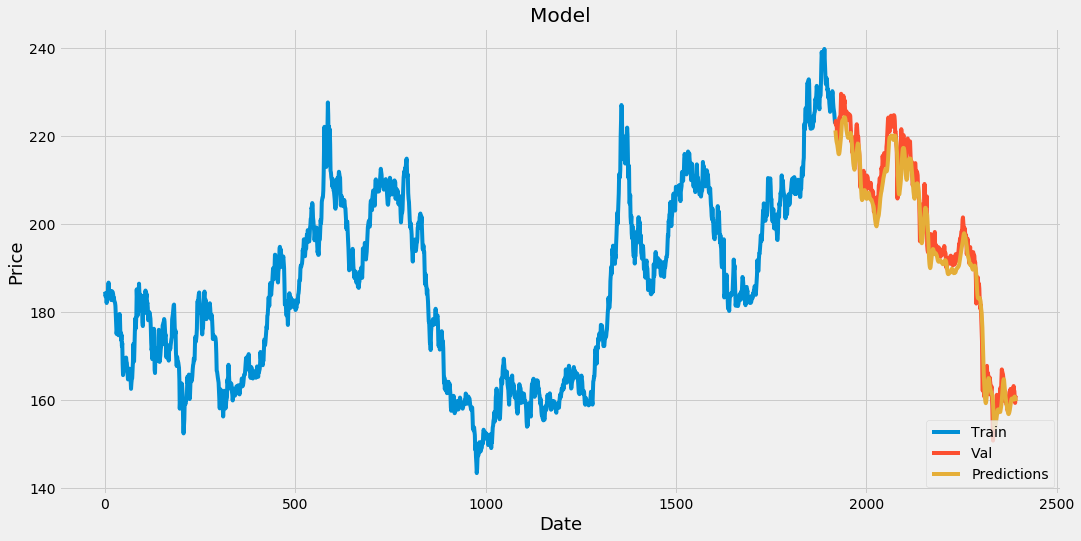

3.8214303520128765
Reached here
Epoch 1/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0125
Epoch 2/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0040
Epoch 3/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0036
Epoch 4/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0030
Epoch 5/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0025
Epoch 6/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0022
Epoch 7/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0019
Epoch 8/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0017
Epoch 9/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0017
Epoch 10/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0017
Epoch 11/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0015A: 0s - loss
Epoch 12/15
1834/1834 [==================

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


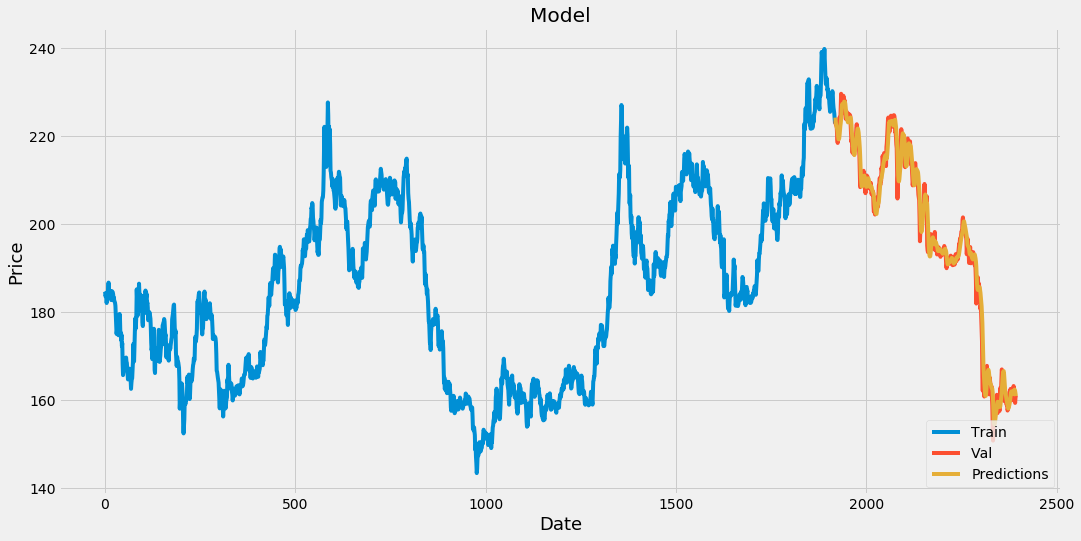

2.6090945215885344
Reached here
Epoch 1/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0208
Epoch 2/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0044
Epoch 3/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0036
Epoch 4/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0038
Epoch 5/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0032
Epoch 6/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0029
Epoch 7/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 8/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0025
Epoch 9/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 10/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0022


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


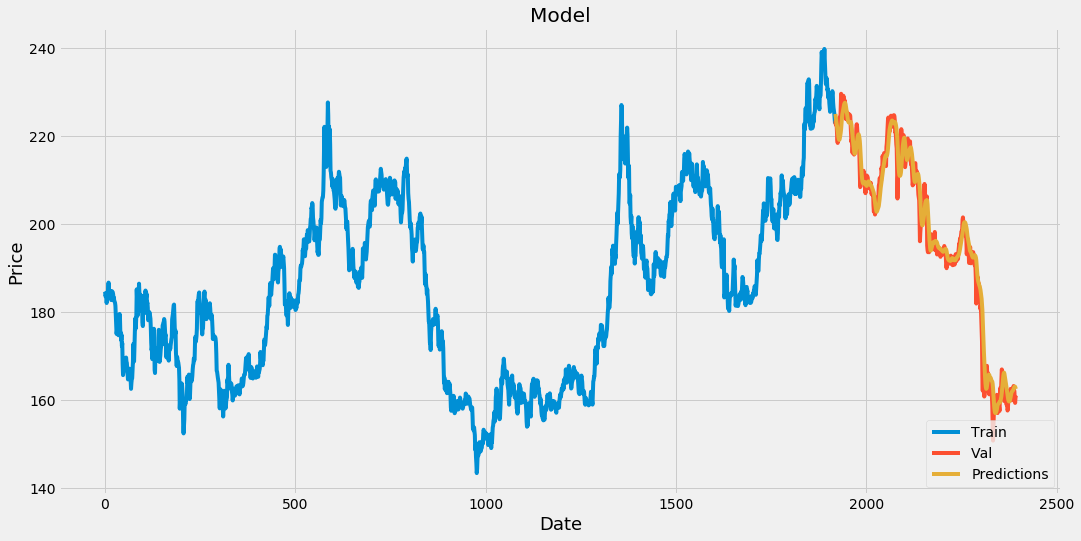

3.3408440736023355
Reached here
Epoch 1/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0337
Epoch 2/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0046
Epoch 3/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0039
Epoch 4/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0032
Epoch 5/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0030
Epoch 6/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0030
Epoch 7/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 8/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 9/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 10/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0021
Epoch 11/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0020
Epoch 12/15
1834/1834 [==============================

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


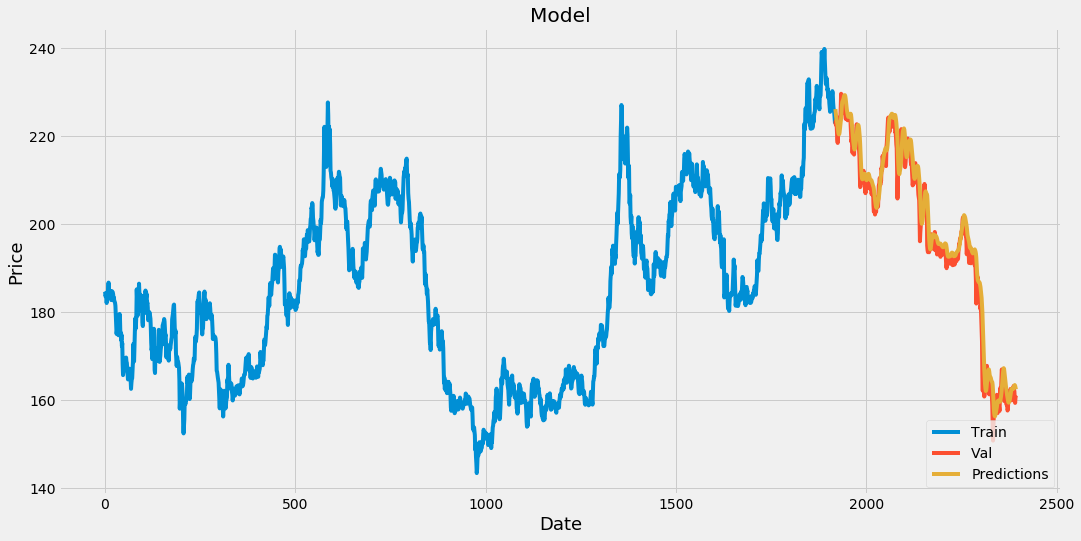

3.326919810091868
Reached here
Epoch 1/10
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0070
Epoch 2/10
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0027
Epoch 3/10
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0019
Epoch 4/10
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0018
Epoch 5/10
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0016
Epoch 6/10
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0016
Epoch 7/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0015
Epoch 8/10
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0014
Epoch 9/10
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0014
Epoch 10/10
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0013


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


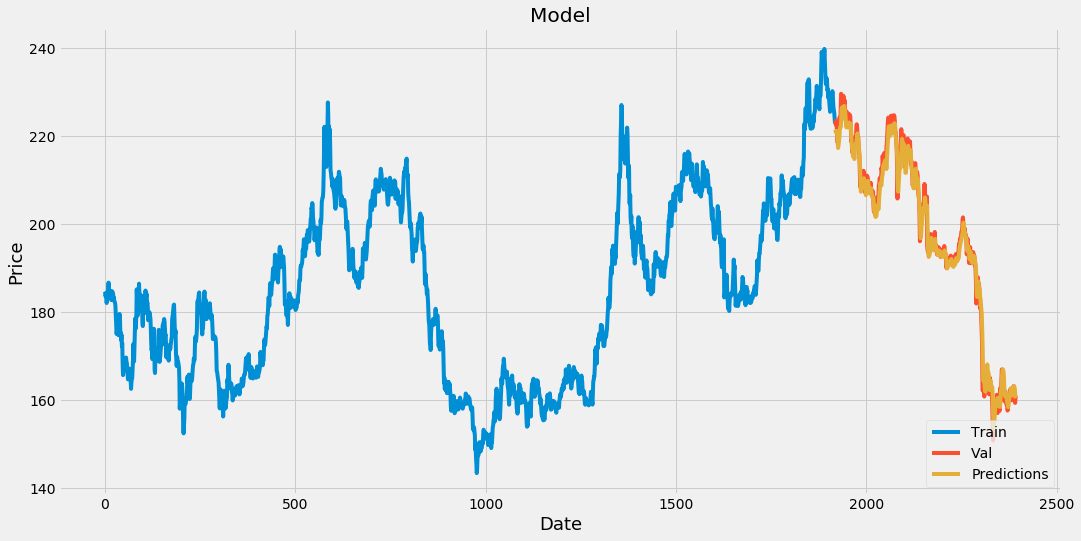

2.189362991425008
Reached here
Epoch 1/15
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0063
Epoch 2/15
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0029
Epoch 3/15
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0021
Epoch 4/15
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0017
Epoch 5/15
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0016
Epoch 6/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0015
Epoch 7/15
1834/1834 [==============================] - 27s 15ms/step - loss: 0.0014
Epoch 8/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0014
Epoch 9/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0014
Epoch 10/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0013
Epoch 11/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0013
Epoch 12/15
1834/1834 [=========

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


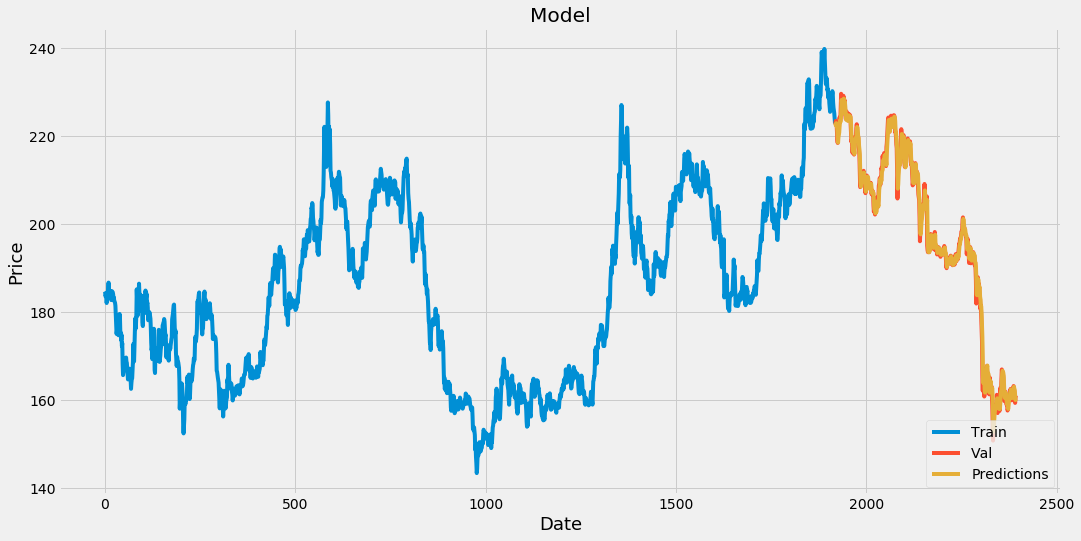

1.8346479586786755
Reached here
Epoch 1/10
1834/1834 [==============================] - 8s 5ms/step - loss: 0.0096
Epoch 2/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0047
Epoch 3/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0034
Epoch 4/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0029
Epoch 5/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0025
Epoch 6/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0021
Epoch 7/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0018
Epoch 8/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0017
Epoch 9/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0015
Epoch 10/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0015


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


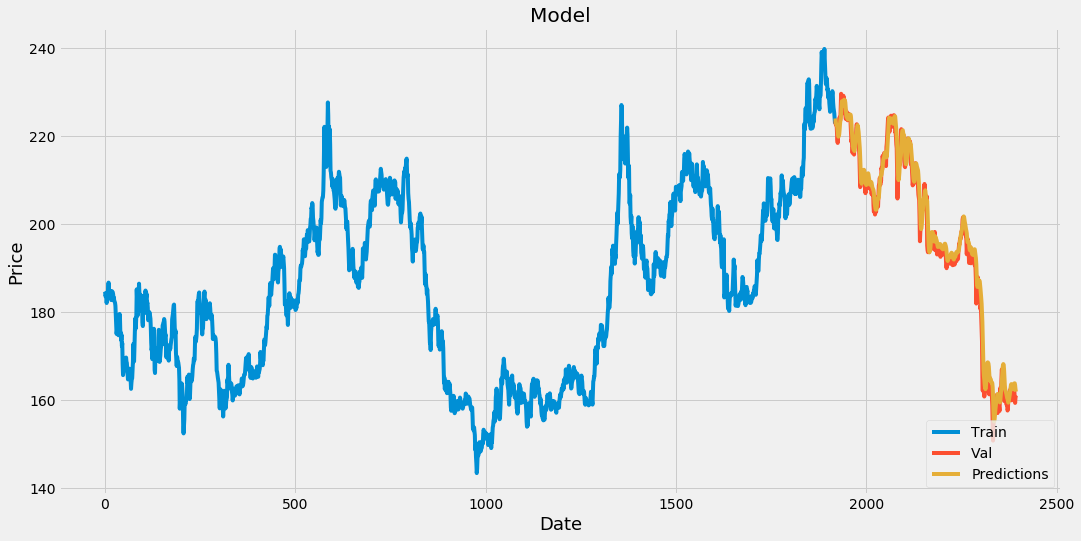

2.6185630170633263
Reached here
Epoch 1/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0135
Epoch 2/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0050
Epoch 3/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0036
Epoch 4/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0028
Epoch 5/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0024
Epoch 6/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0020
Epoch 7/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0019
Epoch 8/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0015
Epoch 9/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0016
Epoch 10/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0015
Epoch 11/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0014
Epoch 12/15
1834/1834 [==============================

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


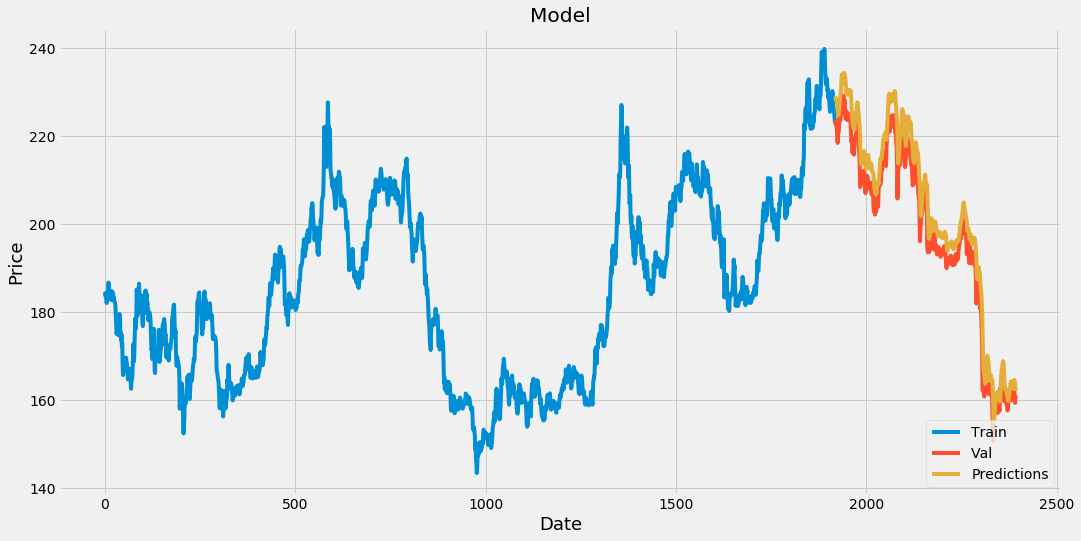

4.914494975369724
Reached here
Epoch 1/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0166
Epoch 2/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0062
Epoch 3/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0050
Epoch 4/10
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0039
Epoch 5/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0036
Epoch 6/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0031
Epoch 7/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0025
Epoch 8/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0024
Epoch 9/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0021
Epoch 10/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0020


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


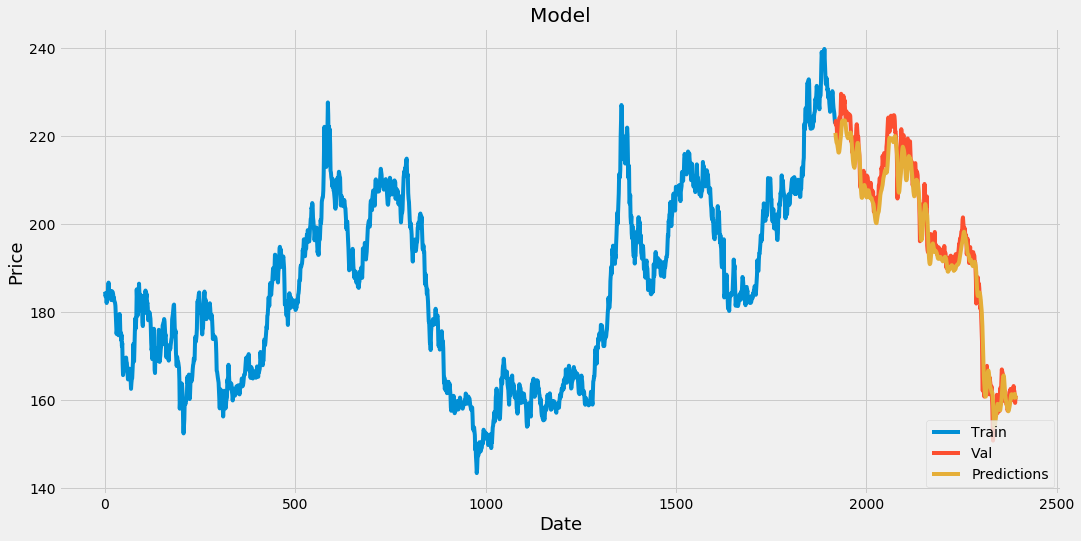

3.4737609341798996
Reached here
Epoch 1/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0137
Epoch 2/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0063
Epoch 3/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0047
Epoch 4/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0043
Epoch 5/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0036
Epoch 6/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0032
Epoch 7/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 8/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 9/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0023
Epoch 10/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0022
Epoch 11/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0021
Epoch 12/15
1834/1834 [==============================

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


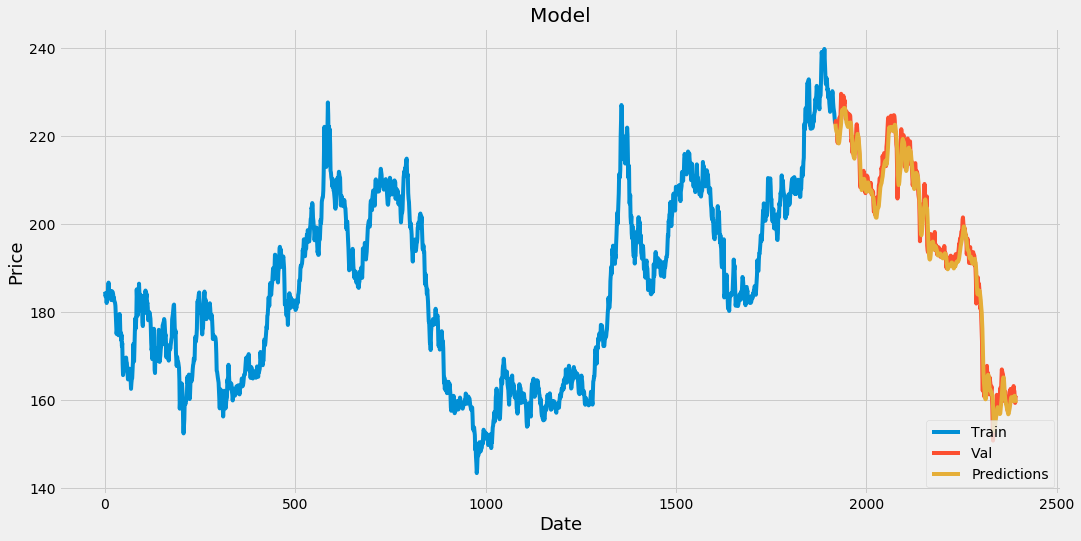

2.671870339418003
Reached here
Epoch 1/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0057
Epoch 2/10
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0025
Epoch 3/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0019
Epoch 4/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0015
Epoch 5/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0015
Epoch 6/10
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0015
Epoch 7/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0015
Epoch 8/10
1834/1834 [==============================] - 30s 17ms/step - loss: 0.0013
Epoch 9/10
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0013
Epoch 10/10
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0014


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


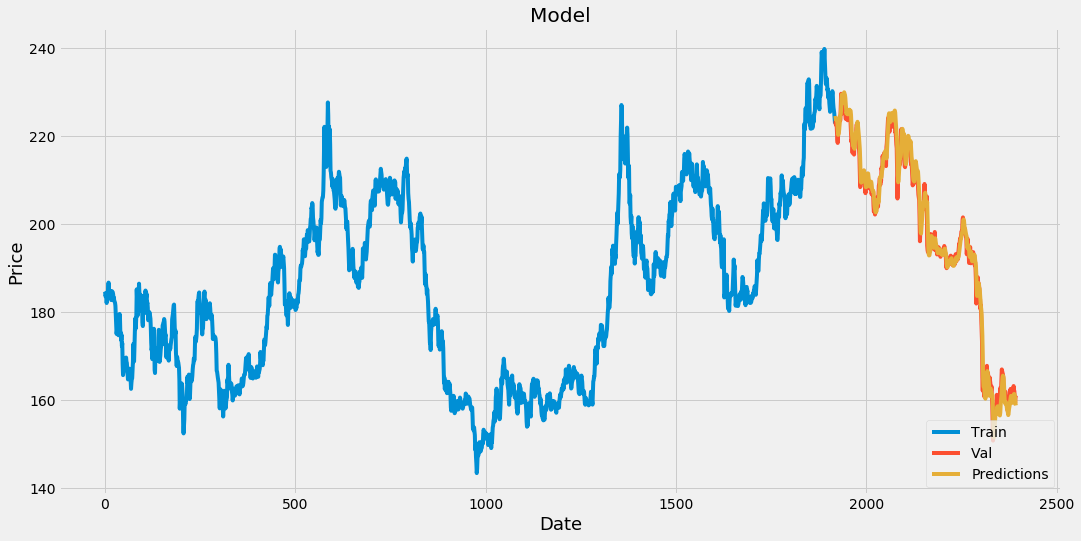

2.2741482938854714
Reached here
Epoch 1/15
1834/1834 [==============================] - 30s 16ms/step - loss: 0.0062
Epoch 2/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0026
Epoch 3/15
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0018
Epoch 4/15
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0016
Epoch 5/15
1834/1834 [==============================] - 28s 16ms/step - loss: 0.0015
Epoch 6/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0013
Epoch 7/15
1834/1834 [==============================] - 28s 15ms/step - loss: 0.0013
Epoch 8/15
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0013
Epoch 9/15
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0012
Epoch 10/15
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0013
Epoch 11/15
1834/1834 [==============================] - 29s 16ms/step - loss: 0.0012
Epoch 12/15
1834/1834 [========

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


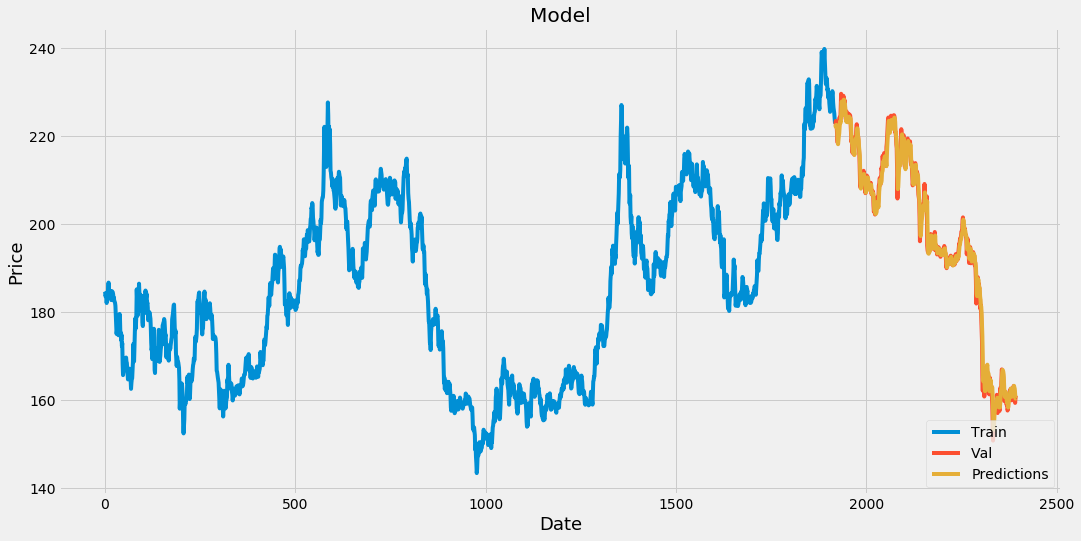

1.8895521890572053
Reached here
Epoch 1/10
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0111
Epoch 2/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0037
Epoch 3/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0028
Epoch 4/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0026
Epoch 5/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0023
Epoch 6/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0021
Epoch 7/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0017
Epoch 8/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0016
Epoch 9/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0015
Epoch 10/10
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0014


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


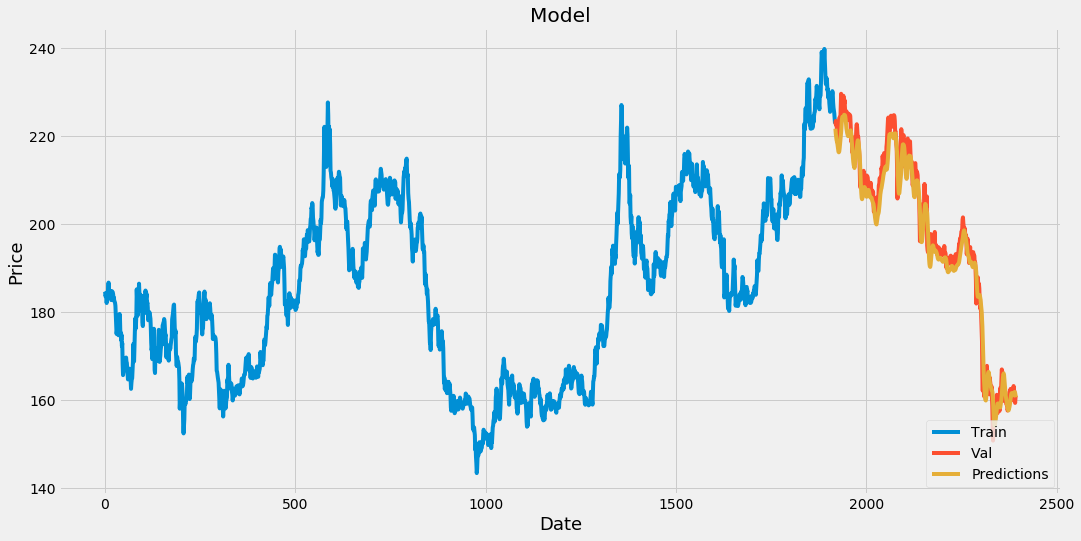

3.4528526322130593
Reached here
Epoch 1/15
1834/1834 [==============================] - 8s 5ms/step - loss: 0.0141
Epoch 2/15
1834/1834 [==============================] - 8s 5ms/step - loss: 0.0036
Epoch 3/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0031
Epoch 4/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0024
Epoch 5/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0021
Epoch 6/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0019
Epoch 7/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0019
Epoch 8/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0016
Epoch 9/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0017
Epoch 10/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0014
Epoch 11/15
1834/1834 [==============================] - 8s 4ms/step - loss: 0.0014
Epoch 12/15
1834/1834 [==============================

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


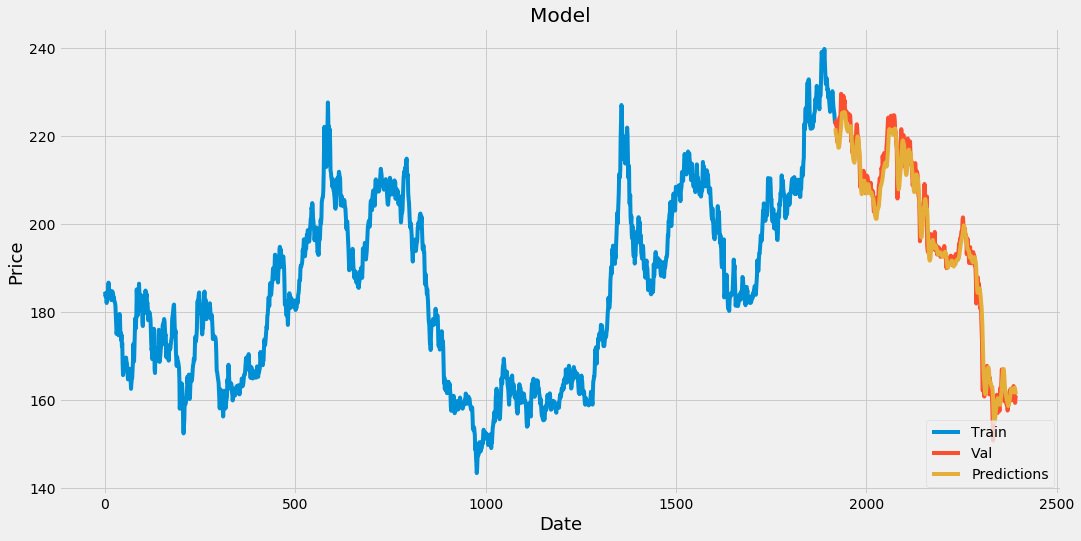

2.816048186767092
Reached here
Epoch 1/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0293
Epoch 2/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0048
Epoch 3/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0041
Epoch 4/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0035
Epoch 5/10
1834/1834 [==============================] - 5s 2ms/step - loss: 0.0032
Epoch 6/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 7/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0027
Epoch 8/10
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 9/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0023
Epoch 10/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0021


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


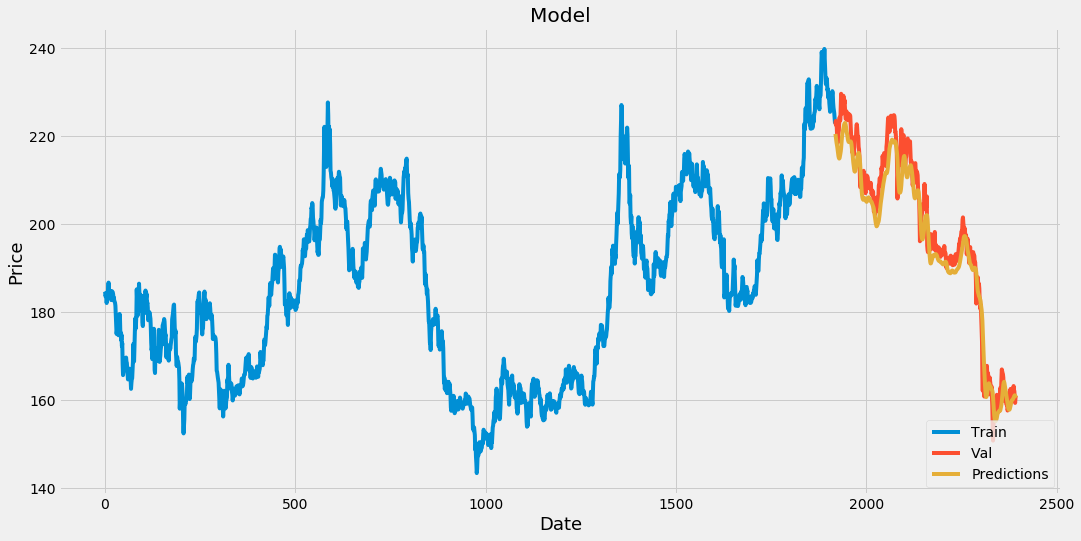

4.468763914705619
Reached here
Epoch 1/15
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0165
Epoch 2/15
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0041
Epoch 3/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0034
Epoch 4/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0032
Epoch 5/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0030
Epoch 6/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0026
Epoch 7/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0027
Epoch 8/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0024
Epoch 9/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0022
Epoch 10/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0019
Epoch 11/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0017
Epoch 12/15
1834/1834 [==============================]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


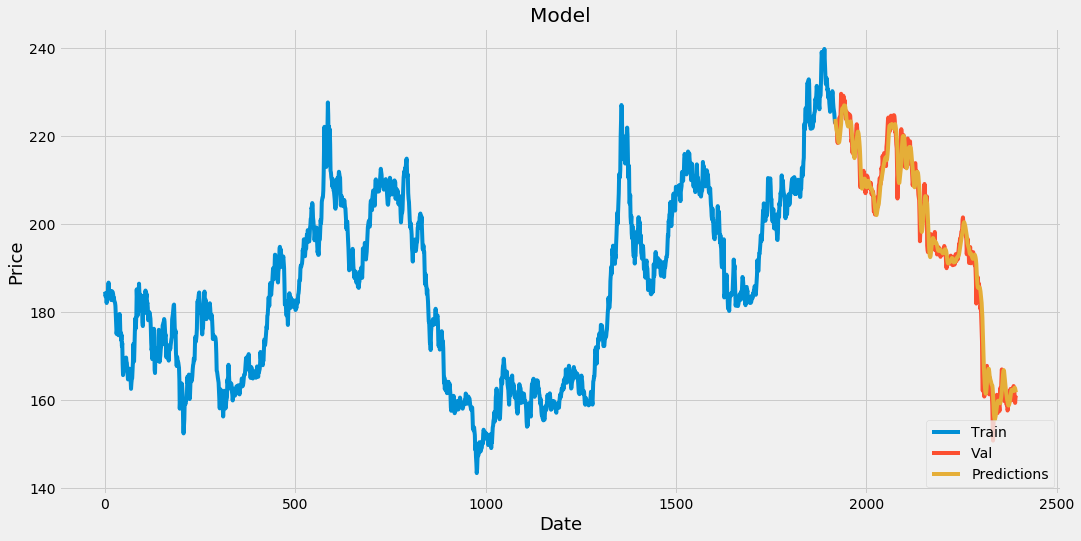

2.9011183615151825
Reached here
Epoch 1/10
1834/1834 [==============================] - 30s 16ms/step - loss: 0.0073
Epoch 2/10
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0027
Epoch 3/10
1834/1834 [==============================] - 32s 17ms/step - loss: 0.0019
Epoch 4/10
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0017
Epoch 5/10
1834/1834 [==============================] - 30s 16ms/step - loss: 0.0015
Epoch 6/10
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0015
Epoch 7/10
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0013
Epoch 8/10
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0014
Epoch 9/10
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0013
Epoch 10/10
1834/1834 [==============================] - 30s 17ms/step - loss: 0.0013


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


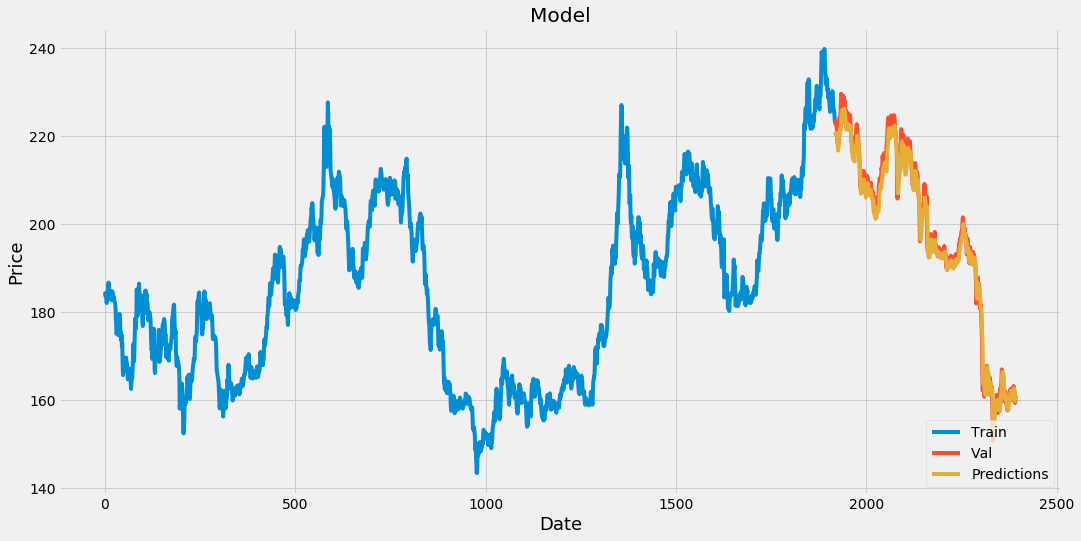

2.2854381412362628
Reached here
Epoch 1/15
1834/1834 [==============================] - 32s 17ms/step - loss: 0.0078
Epoch 2/15
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0027
Epoch 3/15
1834/1834 [==============================] - 33s 18ms/step - loss: 0.0019
Epoch 4/15
1834/1834 [==============================] - 32s 17ms/step - loss: 0.0018
Epoch 5/15
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0015
Epoch 6/15
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0015
Epoch 7/15
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0014
Epoch 8/15
1834/1834 [==============================] - 32s 17ms/step - loss: 0.0013
Epoch 9/15
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0013
Epoch 10/15
1834/1834 [==============================] - 30s 17ms/step - loss: 0.0013
Epoch 11/15
1834/1834 [==============================] - 31s 17ms/step - loss: 0.0012
Epoch 12/15
1834/1834 [========

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


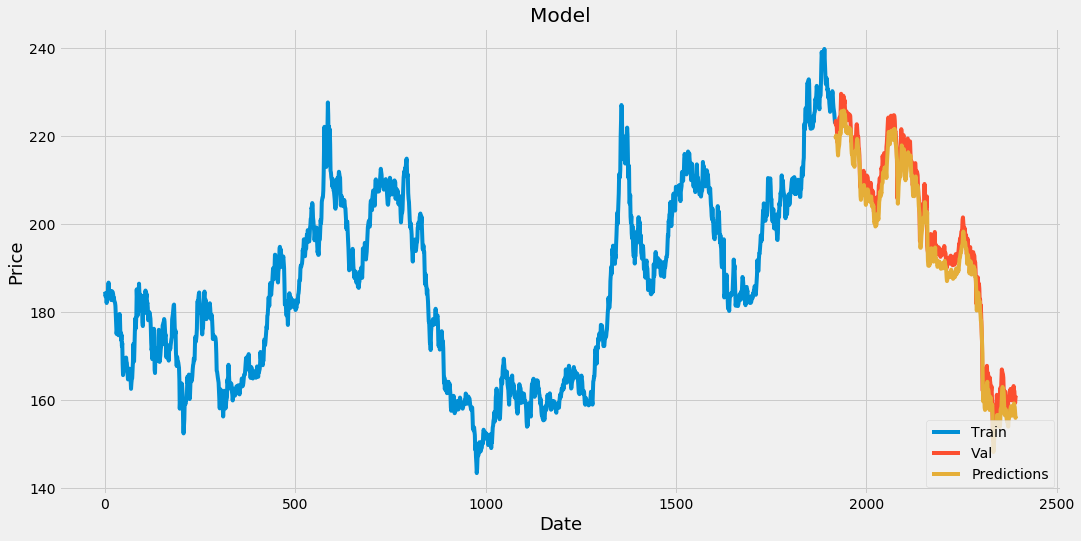

3.5434687710693544
Reached here
Epoch 1/10
1834/1834 [==============================] - 10s 5ms/step - loss: 0.0093
Epoch 2/10
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0044
Epoch 3/10
1834/1834 [==============================] - 8s 5ms/step - loss: 0.0034
Epoch 4/10
1834/1834 [==============================] - 8s 5ms/step - loss: 0.0027
Epoch 5/10
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0021
Epoch 6/10
1834/1834 [==============================] - 8s 5ms/step - loss: 0.0020
Epoch 7/10
1834/1834 [==============================] - 8s 5ms/step - loss: 0.0016
Epoch 8/10
1834/1834 [==============================] - 8s 5ms/step - loss: 0.0016
Epoch 9/10
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0014
Epoch 10/10
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0014


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


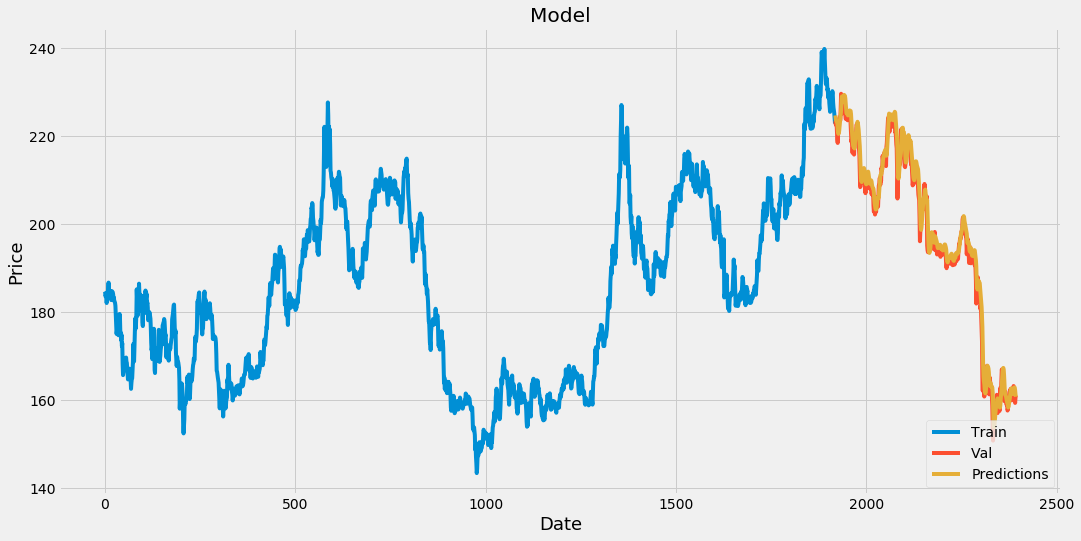

2.5234088699556896
Reached here
Epoch 1/15
1834/1834 [==============================] - 10s 5ms/step - loss: 0.0082
Epoch 2/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0045
Epoch 3/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0034
Epoch 4/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0027
Epoch 5/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0024
Epoch 6/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0019
Epoch 7/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0017
Epoch 8/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0016
Epoch 9/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0015
Epoch 10/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0015
Epoch 11/15
1834/1834 [==============================] - 9s 5ms/step - loss: 0.0014
Epoch 12/15
1834/1834 [=============================

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


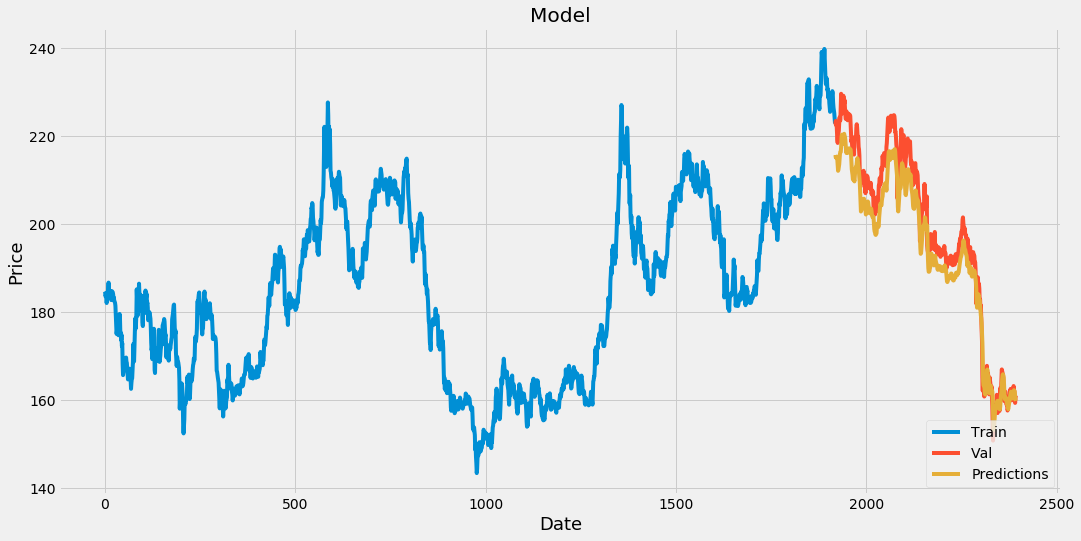

5.357633204799018
Reached here
Epoch 1/10
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0135
Epoch 2/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0054
Epoch 3/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0042
Epoch 4/10
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0033
Epoch 5/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0032
Epoch 6/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0029
Epoch 7/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0025
Epoch 8/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0024
Epoch 9/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0022
Epoch 10/10
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0020


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


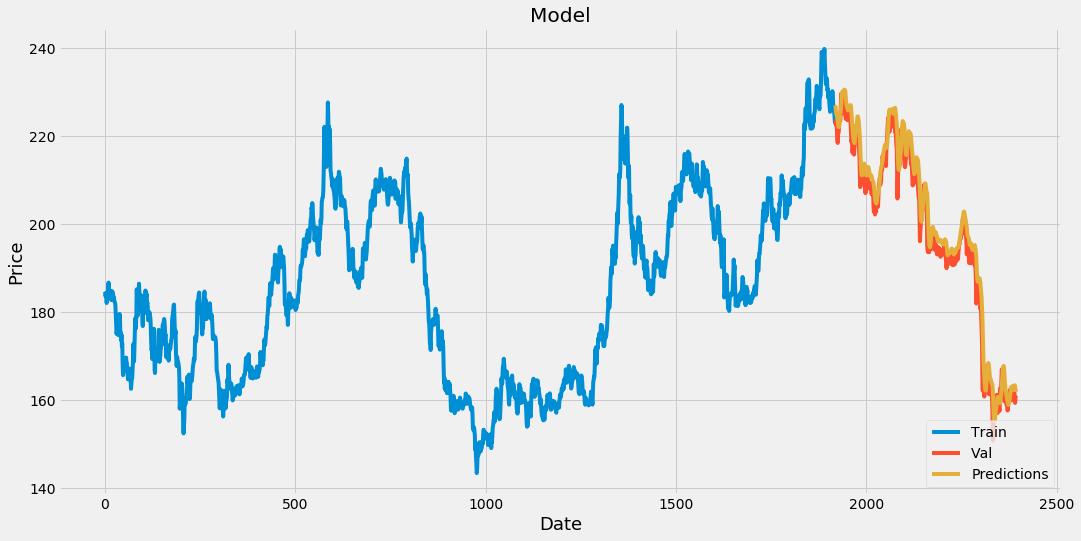

3.5542470995989324
Reached here
Epoch 1/15
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0157
Epoch 2/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0059
Epoch 3/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0051
Epoch 4/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0039
Epoch 5/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0037
Epoch 6/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0030
Epoch 7/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0028
Epoch 8/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0023
Epoch 9/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0023
Epoch 10/15
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0021
Epoch 11/15
1834/1834 [==============================] - 5s 2ms/step - loss: 0.0018
Epoch 12/15
1834/1834 [==============================

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


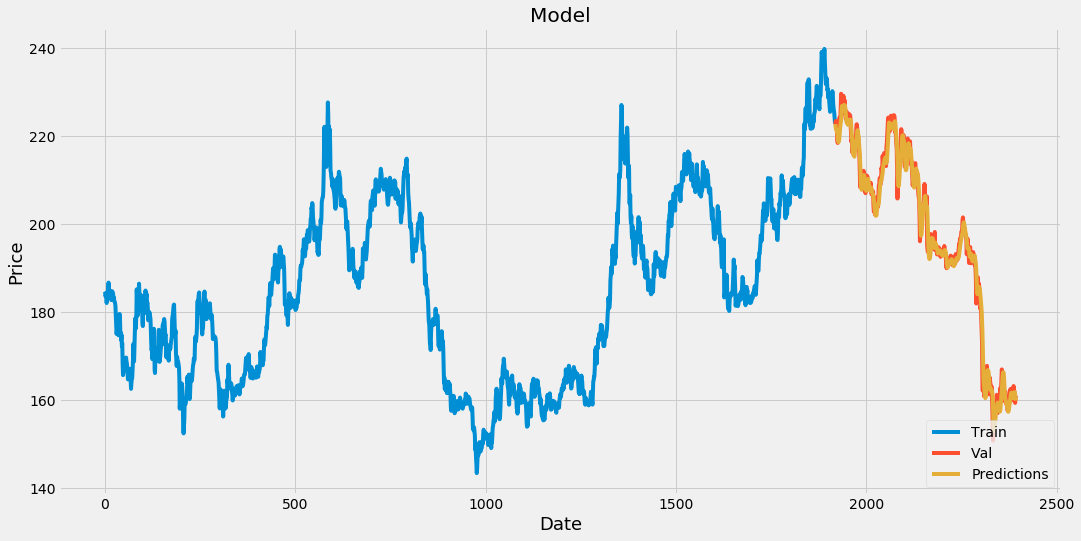

2.3873821885381


In [8]:
result_error = []
result_parameters = []

time_values = [60]
neurons_values = [40,50]
optimizer_values = ['adam','rmsprop']
batch_values = [4,16,32]
epochs_values = [10,15]

# dataset = df.values#Get /Compute the number of rows to train the model on
# training_data_len = math.ceil( len(dataset) *.8) 

# #Scale the all of the data to be values between 0 and 1 
# scaler = MinMaxScaler(feature_range=(0, 1)) 
# scaled_data = scaler.fit_transform(dataset)

# #Create the scaled training data set 
# train_data = scaled_data[0:training_data_len  , : ]#Split the data into x_train and y_train data sets


for t in time_values:
    for n in neurons_values:
        for o in optimizer_values:
            for b in batch_values:
                for e in epochs_values:
                    result_parameters.append([t,n,o,b,e])
                    result_error.append(modelTraining(t,n,o,b,e,train_data))


In [9]:
print(result_parameters)
print(result_error)

[[60, 40, 'adam', 4, 10], [60, 40, 'adam', 4, 15], [60, 40, 'adam', 16, 10], [60, 40, 'adam', 16, 15], [60, 40, 'adam', 32, 10], [60, 40, 'adam', 32, 15], [60, 40, 'rmsprop', 4, 10], [60, 40, 'rmsprop', 4, 15], [60, 40, 'rmsprop', 16, 10], [60, 40, 'rmsprop', 16, 15], [60, 40, 'rmsprop', 32, 10], [60, 40, 'rmsprop', 32, 15], [60, 50, 'adam', 4, 10], [60, 50, 'adam', 4, 15], [60, 50, 'adam', 16, 10], [60, 50, 'adam', 16, 15], [60, 50, 'adam', 32, 10], [60, 50, 'adam', 32, 15], [60, 50, 'rmsprop', 4, 10], [60, 50, 'rmsprop', 4, 15], [60, 50, 'rmsprop', 16, 10], [60, 50, 'rmsprop', 16, 15], [60, 50, 'rmsprop', 32, 10], [60, 50, 'rmsprop', 32, 15]]
[2.2695695031418013, 2.537485221368788, 3.8214303520128765, 2.6090945215885344, 3.3408440736023355, 3.326919810091868, 2.189362991425008, 1.8346479586786755, 2.6185630170633263, 4.914494975369724, 3.4737609341798996, 2.671870339418003, 2.2741482938854714, 1.8895521890572053, 3.4528526322130593, 2.816048186767092, 4.468763914705619, 2.90111836151

In [10]:
min_index = result_error.index(min(result_error))
result_parameters[min_index]

[60, 40, 'rmsprop', 4, 15]

**Prameter Tunning result for 60 days time lookup**

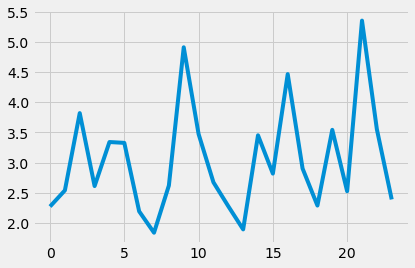

In [11]:
plt.plot(result_error)

In [12]:
for i in range(len(result_error)):
    result_parameters[i].append(result_error[i])

In [13]:
result_parameters

[[60, 40, 'adam', 4, 10, 2.2695695031418013],
 [60, 40, 'adam', 4, 15, 2.537485221368788],
 [60, 40, 'adam', 16, 10, 3.8214303520128765],
 [60, 40, 'adam', 16, 15, 2.6090945215885344],
 [60, 40, 'adam', 32, 10, 3.3408440736023355],
 [60, 40, 'adam', 32, 15, 3.326919810091868],
 [60, 40, 'rmsprop', 4, 10, 2.189362991425008],
 [60, 40, 'rmsprop', 4, 15, 1.8346479586786755],
 [60, 40, 'rmsprop', 16, 10, 2.6185630170633263],
 [60, 40, 'rmsprop', 16, 15, 4.914494975369724],
 [60, 40, 'rmsprop', 32, 10, 3.4737609341798996],
 [60, 40, 'rmsprop', 32, 15, 2.671870339418003],
 [60, 50, 'adam', 4, 10, 2.2741482938854714],
 [60, 50, 'adam', 4, 15, 1.8895521890572053],
 [60, 50, 'adam', 16, 10, 3.4528526322130593],
 [60, 50, 'adam', 16, 15, 2.816048186767092],
 [60, 50, 'adam', 32, 10, 4.468763914705619],
 [60, 50, 'adam', 32, 15, 2.9011183615151825],
 [60, 50, 'rmsprop', 4, 10, 2.2854381412362628],
 [60, 50, 'rmsprop', 4, 15, 3.5434687710693544],
 [60, 50, 'rmsprop', 16, 10, 2.5234088699556896],
 

In [14]:
conclusion = pd.DataFrame(result_parameters,columns=['learning_time','neurons','optimizer','batch_size','epochs','RMS'])

## Results in tabular form

In [15]:
conclusion

,learning_time,neurons,optimizer,batch_size,epochs,RMS
0,60,40,adam,4,10,2.269570
1,60,40,adam,4,15,2.537485
2,60,40,adam,16,10,3.821430
3,60,40,adam,16,15,2.609095
4,60,40,adam,32,10,3.340844
5,60,40,adam,32,15,3.326920
6,60,40,rmsprop,4,10,2.189363
7,60,40,rmsprop,4,15,1.834648
8,60,40,rmsprop,16,10,2.618563
9,60,40,rmsprop,16,15,4.914495


In [17]:
conclusion.sort_values('RMS')

,learning_time,neurons,optimizer,batch_size,epochs,RMS
7,60,40,rmsprop,4,15,1.834648
13,60,50,adam,4,15,1.889552
6,60,40,rmsprop,4,10,2.189363
0,60,40,adam,4,10,2.269570
12,60,50,adam,4,10,2.274148
18,60,50,rmsprop,4,10,2.285438
23,60,50,rmsprop,32,15,2.387382
20,60,50,rmsprop,16,10,2.523409
1,60,40,adam,4,15,2.537485
3,60,40,adam,16,15,2.609095


# Observations

* **The Best Result comes with parameters: Neurons = 40, Optimizer = RMSPROP, Batch_size = 4, Epochs = 15**

* So we will consider above 2 best parametrs and test for time parameters: 45 and 30 to see if we can increse the accuracy

* We could have added the Time parameter in parameter tuning but it then require 72 combinations. Our current hardware and kaggle use limit does not permit this

## Training on 45 days as lookup Time

Reached here
Epoch 1/15
1849/1849 [==============================] - 22s 12ms/step - loss: 0.0075
Epoch 2/15
1849/1849 [==============================] - 22s 12ms/step - loss: 0.0024
Epoch 3/15
1849/1849 [==============================] - 22s 12ms/step - loss: 0.0019
Epoch 4/15
1849/1849 [==============================] - 22s 12ms/step - loss: 0.0016
Epoch 5/15
1849/1849 [==============================] - 23s 12ms/step - loss: 0.0015
Epoch 6/15
1849/1849 [==============================] - 23s 12ms/step - loss: 0.0014
Epoch 7/15
1849/1849 [==============================] - 23s 12ms/step - loss: 0.0016
Epoch 8/15
1849/1849 [==============================] - 22s 12ms/step - loss: 0.0013
Epoch 9/15
1849/1849 [==============================] - 22s 12ms/step - loss: 0.0014
Epoch 10/15
1849/1849 [==============================] - 22s 12ms/step - loss: 0.0013
Epoch 11/15
1849/1849 [==============================] - 22s 12ms/step - loss: 0.0013
Epoch 12/15
1849/1849 [===========================

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


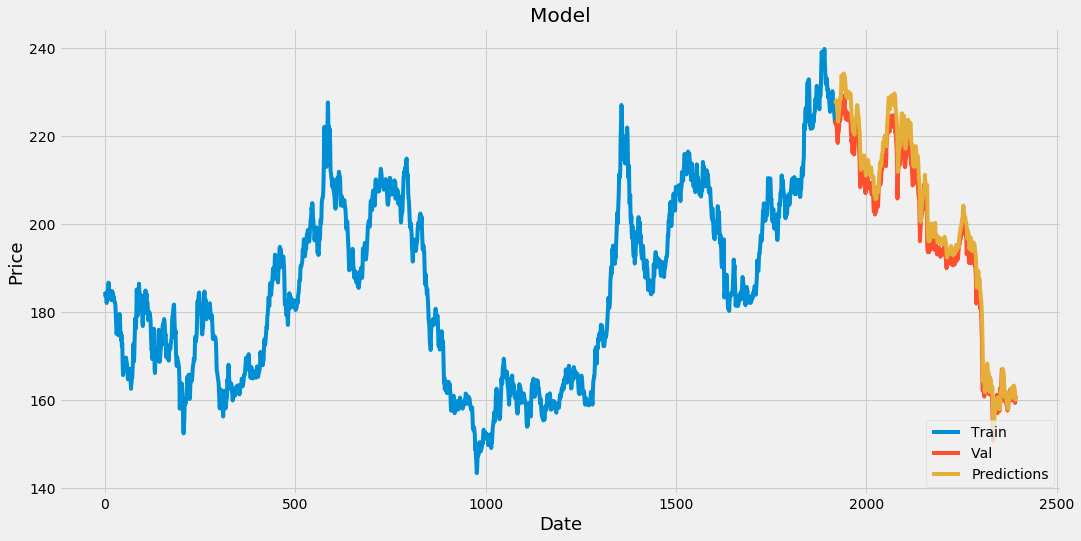

3.882963693327739
Reached here
Epoch 1/15
1849/1849 [==============================] - 24s 13ms/step - loss: 0.0048
Epoch 2/15
1849/1849 [==============================] - 23s 12ms/step - loss: 0.0029
Epoch 3/15
1849/1849 [==============================] - 23s 13ms/step - loss: 0.0019
Epoch 4/15
1849/1849 [==============================] - 23s 12ms/step - loss: 0.0013
Epoch 5/15
1849/1849 [==============================] - 24s 13ms/step - loss: 0.0014
Epoch 6/15
1849/1849 [==============================] - 22s 12ms/step - loss: 0.0014
Epoch 7/15
1849/1849 [==============================] - 23s 12ms/step - loss: 0.0014
Epoch 8/15
1849/1849 [==============================] - 23s 12ms/step - loss: 0.0013
Epoch 9/15
1849/1849 [==============================] - 23s 12ms/step - loss: 0.0013
Epoch 10/15
1849/1849 [==============================] - 23s 12ms/step - loss: 0.0011
Epoch 11/15
1849/1849 [==============================] - 22s 12ms/step - loss: 0.0012
Epoch 12/15
1849/1849 [=========

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


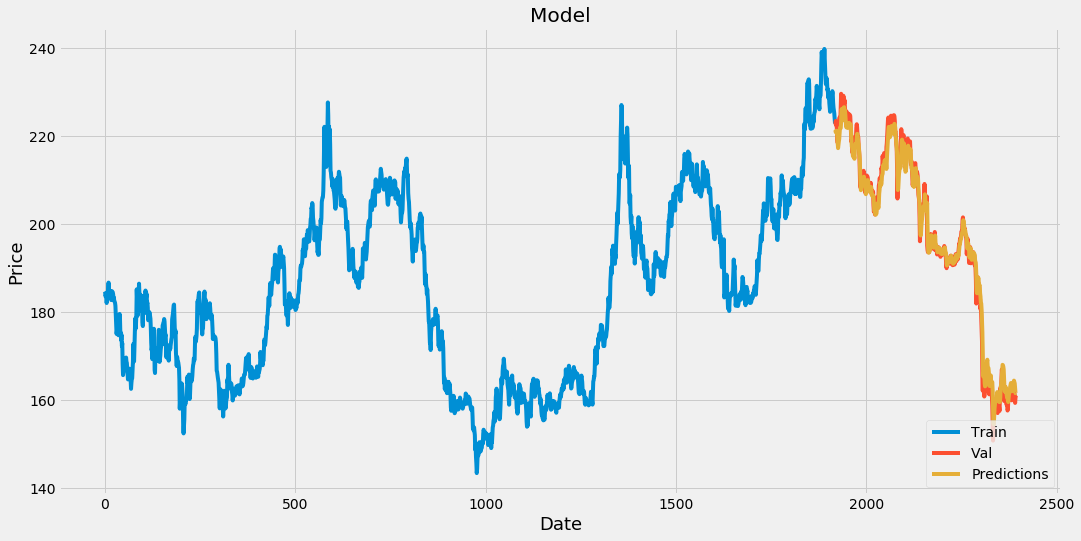

2.198822282913068


In [18]:
# Training on 45 days
result_error_45 = []
result_parameter_45 = [[45,40,'rmsprop',4,15],[45,50,'adam',4,15]]

result_error_45.append(modelTraining(45,40,'rmsprop',4,15,train_data))
result_error_45.append(modelTraining(45,50,'adam',4,15,train_data))

In [19]:
print(result_parameter_45)
print(result_error_45)

[[45, 40, 'rmsprop', 4, 15], [45, 50, 'adam', 4, 15]]
[3.882963693327739, 2.198822282913068]


In [20]:
for i in range(len(result_error_45)):
    result_parameter_45[i].append(result_error_45[i])

In [21]:
conclusion_45 = pd.DataFrame(result_parameter_45,columns=['learning_time','neurons','optimizer','batch_size','epochs','RMS'])

In [22]:
conclusion_45

,learning_time,neurons,optimizer,batch_size,epochs,RMS
0,45,40,rmsprop,4,15,3.882964
1,45,50,adam,4,15,2.198822


## Training on 30 days as lookup time

Reached here
Epoch 1/15
1864/1864 [==============================] - 16s 9ms/step - loss: 0.0064
Epoch 2/15
1864/1864 [==============================] - 15s 8ms/step - loss: 0.0028
Epoch 3/15
1864/1864 [==============================] - 14s 8ms/step - loss: 0.0019
Epoch 4/15
1864/1864 [==============================] - 15s 8ms/step - loss: 0.0017
Epoch 5/15
1864/1864 [==============================] - 15s 8ms/step - loss: 0.0016
Epoch 6/15
1864/1864 [==============================] - 15s 8ms/step - loss: 0.0016
Epoch 7/15
1864/1864 [==============================] - 14s 8ms/step - loss: 0.0015
Epoch 8/15
1864/1864 [==============================] - 14s 8ms/step - loss: 0.0014
Epoch 9/15
1864/1864 [==============================] - 15s 8ms/step - loss: 0.0013
Epoch 10/15
1864/1864 [==============================] - 15s 8ms/step - loss: 0.0014
Epoch 11/15
1864/1864 [==============================] - 14s 8ms/step - loss: 0.0013
Epoch 12/15
1864/1864 [==============================] - 15s 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


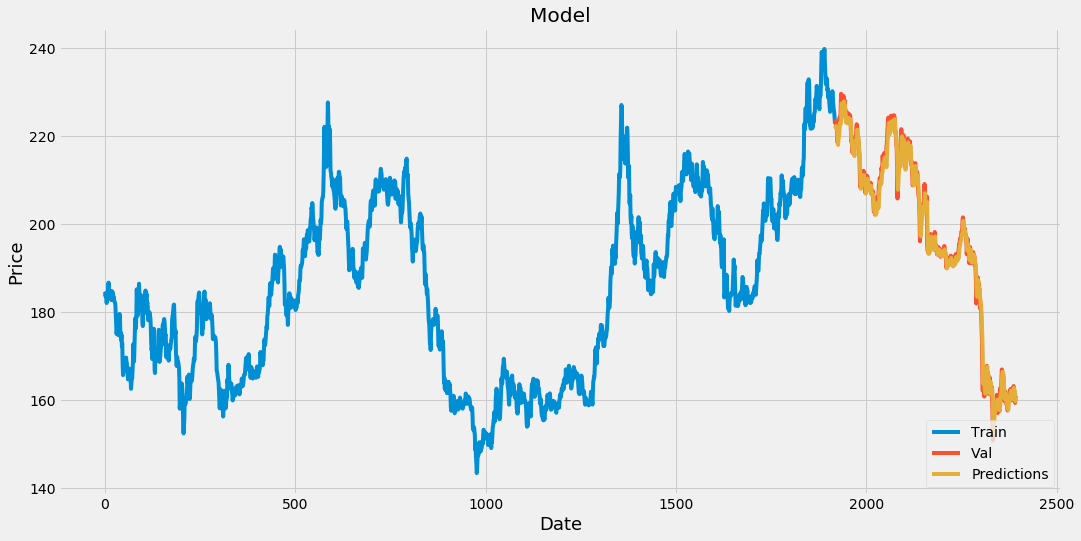

1.8930236026504055
Reached here
Epoch 1/15
1864/1864 [==============================] - 16s 9ms/step - loss: 0.0062
Epoch 2/15
1864/1864 [==============================] - 15s 8ms/step - loss: 0.0023
Epoch 3/15
1864/1864 [==============================] - 15s 8ms/step - loss: 0.0017
Epoch 4/15
1864/1864 [==============================] - 17s 9ms/step - loss: 0.0016
Epoch 5/15
1864/1864 [==============================] - 15s 8ms/step - loss: 0.0015
Epoch 6/15
1864/1864 [==============================] - 16s 8ms/step - loss: 0.0014
Epoch 7/15
1864/1864 [==============================] - 17s 9ms/step - loss: 0.0015
Epoch 8/15
1864/1864 [==============================] - 16s 8ms/step - loss: 0.0013
Epoch 9/15
1864/1864 [==============================] - 16s 8ms/step - loss: 0.0012
Epoch 10/15
1864/1864 [==============================] - 15s 8ms/step - loss: 0.0012
Epoch 11/15
1864/1864 [==============================] - 15s 8ms/step - loss: 0.0012
Epoch 12/15
1864/1864 [===================

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


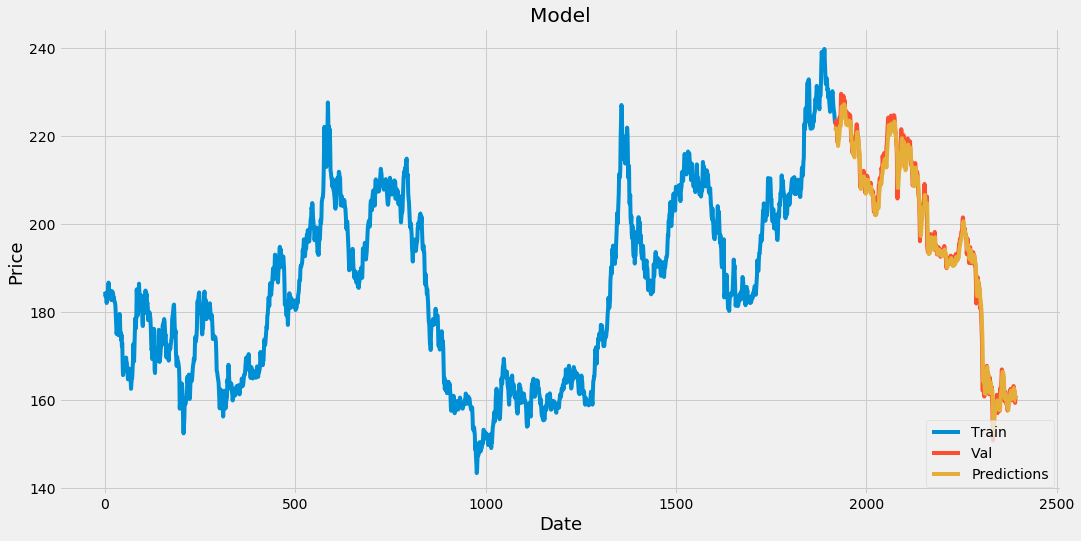

2.011337964207364


In [23]:
# Training on 30 days
result_error_30 = []
result_parameter_30 = [[30,40,'rmsprop',4,15],[30,50,'adam',4,15]]

result_error_30.append(modelTraining(30,40,'rmsprop',4,15,train_data))
result_error_30.append(modelTraining(30,50,'adam',4,15,train_data))

In [24]:
print(result_parameter_30)
print(result_error_30)

[[30, 40, 'rmsprop', 4, 15], [30, 50, 'adam', 4, 15]]
[1.8930236026504055, 2.011337964207364]


In [25]:
for i in range(len(result_error_30)):
    result_parameter_30[i].append(result_error_30[i])

In [26]:
conclusion_30 = pd.DataFrame(result_parameter_30,columns=['learning_time','neurons','optimizer','batch_size','epochs','RMS'])

In [27]:
conclusion_30

,learning_time,neurons,optimizer,batch_size,epochs,RMS
0,30,40,rmsprop,4,15,1.893024
1,30,50,adam,4,15,2.011338


## Overall results

In [28]:
results = pd.concat([conclusion,conclusion_45,conclusion_30], axis=0)
results

,learning_time,neurons,optimizer,batch_size,epochs,RMS
0,60,40,adam,4,10,2.269570
1,60,40,adam,4,15,2.537485
2,60,40,adam,16,10,3.821430
3,60,40,adam,16,15,2.609095
4,60,40,adam,32,10,3.340844
5,60,40,adam,32,15,3.326920
6,60,40,rmsprop,4,10,2.189363
7,60,40,rmsprop,4,15,1.834648
8,60,40,rmsprop,16,10,2.618563
9,60,40,rmsprop,16,15,4.914495


In [29]:
results.sort_values('RMS') 

,learning_time,neurons,optimizer,batch_size,epochs,RMS
7,60,40,rmsprop,4,15,1.834648
13,60,50,adam,4,15,1.889552
0,30,40,rmsprop,4,15,1.893024
1,30,50,adam,4,15,2.011338
6,60,40,rmsprop,4,10,2.189363
1,45,50,adam,4,15,2.198822
0,60,40,adam,4,10,2.269570
12,60,50,adam,4,10,2.274148
18,60,50,rmsprop,4,10,2.285438
23,60,50,rmsprop,32,15,2.387382


# Top 3 model parameters with least error

# 1. RMS = 1.834648

## Parameters

### Time = 60, Neurons = 40, Optimizer = RMSPROP, Batch_size = 4, Epochs = 15
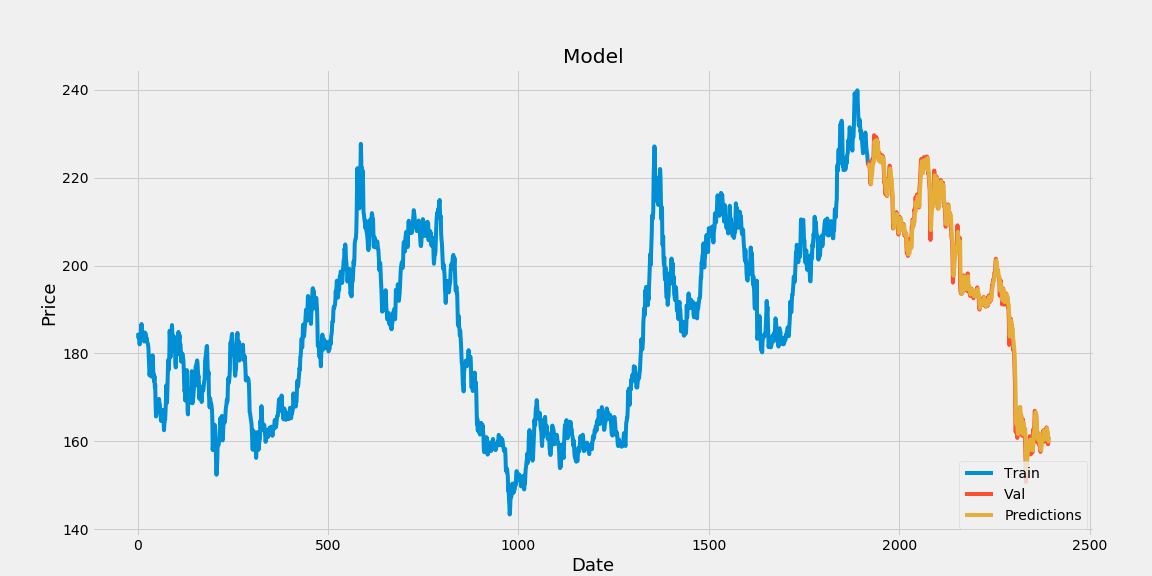

# 2. RMS = 1.889552

## Parameters


## Time = 60, Neurons = 50, Optimizer =ADAM, Batch_size = 4, Epochs = 15
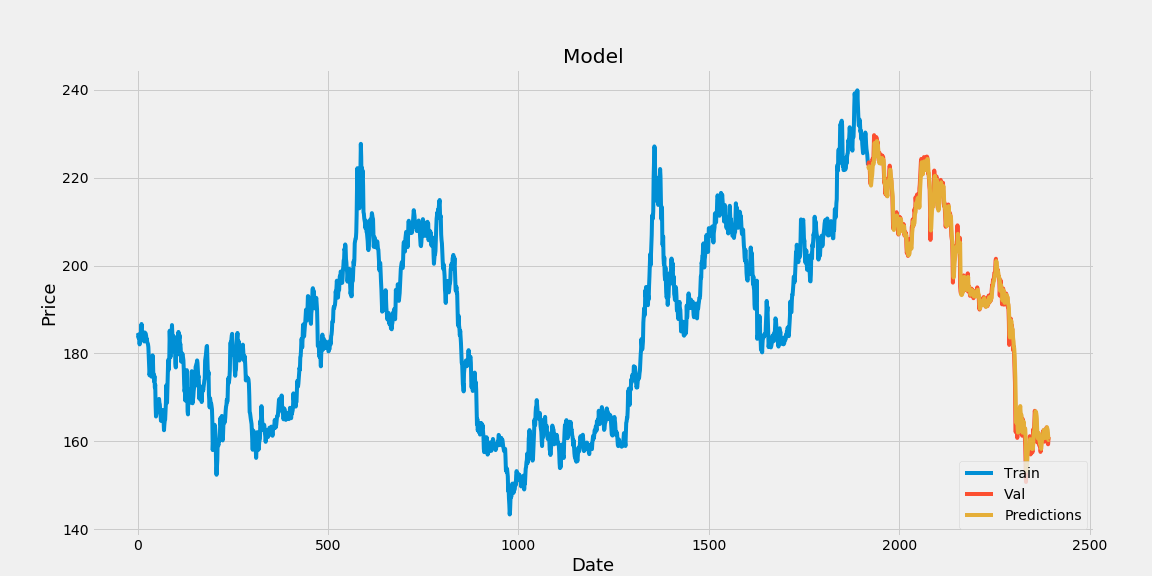

# 3. RMS = 1.893024

## Parameters

## Time = 30, Neurons = 40, Optimizer = RMSPROP, Batch_size = 4, Epochs = 15
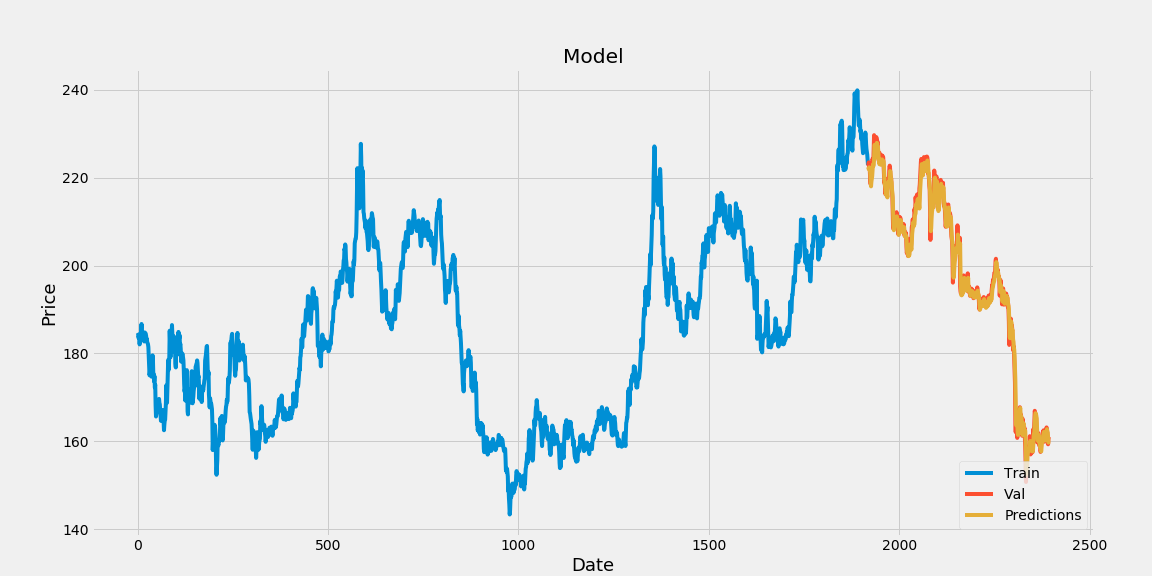